In [17]:
"""Example of pykitti.raw usage."""
import itertools
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import pykitti

__author__ = "Lee Clement"
__email__ = "lee.clement@robotics.utias.utoronto.ca"

# Change this to the directory where you store KITTI data
basedir = 'C:\\Users\\Main\\Documents\\raw'

# Specify the dataset to load
date = '2011_09_26'
drive = '0001'

# Load the data. Optionally, specify the frame range to load.
# dataset = pykitti.raw(basedir, date, drive)
dataset = pykitti.raw(basedir, date, drive, frames=range(0, 20, 5))

# dataset.calib:         Calibration data are accessible as a named tuple
# dataset.timestamps:    Timestamps are parsed into a list of datetime objects
# dataset.oxts:          List of OXTS packets and 6-dof poses as named tuples
# dataset.camN:          Returns a generator that loads individual images from camera N
# dataset.get_camN(idx): Returns the image from camera N at idx
# dataset.gray:          Returns a generator that loads monochrome stereo pairs (cam0, cam1)
# dataset.get_gray(idx): Returns the monochrome stereo pair at idx
# dataset.rgb:           Returns a generator that loads RGB stereo pairs (cam2, cam3)
# dataset.get_rgb(idx):  Returns the RGB stereo pair at idx
# dataset.velo:          Returns a generator that loads velodyne scans as [x,y,z,reflectance]
# dataset.get_velo(idx): Returns the velodyne scan at idx


Drive: 2011_09_26_drive_0001_sync

Frame range: range(0, 20, 5)

IMU-to-Velodyne transformation:
[[ 1.      0.0008 -0.002  -0.8087]
 [-0.0008  0.9999 -0.0148  0.3196]
 [ 0.002   0.0148  0.9999 -0.7997]
 [ 0.      0.      0.      1.    ]]

Gray stereo pair baseline [m]: 0.537150600500771

RGB stereo pair baseline [m]: 0.5327254400790535

First timestamp: 2011-09-26 13:02:25.964389

Second IMU pose:
[[-0.8678  0.4963 -0.0243 -5.8173]
 [-0.4968 -0.8675  0.0254 -3.4647]
 [-0.0084  0.0341  0.9994  0.0236]
 [ 0.      0.      0.      1.    ]]


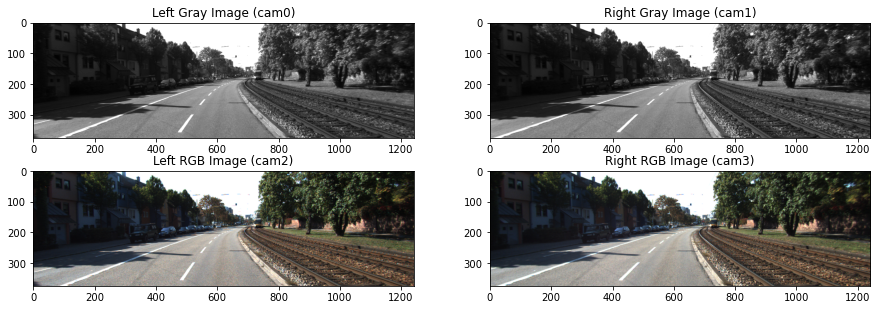

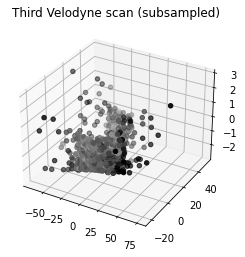

In [18]:
# Grab some data
second_pose = dataset.oxts[1].T_w_imu
first_gray = next(iter(dataset.gray))
first_cam1 = next(iter(dataset.cam1))
first_rgb = dataset.get_rgb(0)
first_cam2 = dataset.get_cam2(0)
third_velo = dataset.get_velo(2)

# Display some of the data
np.set_printoptions(precision=4, suppress=True)
print('\nDrive: ' + str(dataset.drive))
print('\nFrame range: ' + str(dataset.frames))

print('\nIMU-to-Velodyne transformation:\n' + str(dataset.calib.T_velo_imu))
print('\nGray stereo pair baseline [m]: ' + str(dataset.calib.b_gray))
print('\nRGB stereo pair baseline [m]: ' + str(dataset.calib.b_rgb))

print('\nFirst timestamp: ' + str(dataset.timestamps[0]))
print('\nSecond IMU pose:\n' + str(second_pose))

f, ax = plt.subplots(2, 2, figsize=(15, 5))
ax[0, 0].imshow(first_gray[0], cmap='gray')
ax[0, 0].set_title('Left Gray Image (cam0)')

ax[0, 1].imshow(first_cam1, cmap='gray')
ax[0, 1].set_title('Right Gray Image (cam1)')

ax[1, 0].imshow(first_cam2)
ax[1, 0].set_title('Left RGB Image (cam2)')

ax[1, 1].imshow(first_rgb[1])
ax[1, 1].set_title('Right RGB Image (cam3)')


f2 = plt.figure()
ax2 = f2.add_subplot(111, projection='3d')
# Plot every 100th point so things don't get too bogged down
velo_range = range(0, third_velo.shape[0], 100)
ax2.scatter(third_velo[velo_range, 0],
            third_velo[velo_range, 1],
            third_velo[velo_range, 2],
            c=third_velo[velo_range, 3],
            cmap='gray')
ax2.set_title('Third Velodyne scan (subsampled)')

plt.show()


(8.4329721922397, 8.4342971002335, 49.014596344219, 49.015003823272)


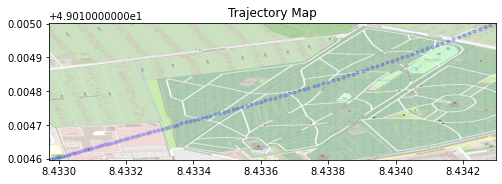

In [62]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
DIR = r"C:\Users\Main\Documents\raw\2011_09_26\2011_09_26_drive_0001_sync\oxts\data"

txtFile = []
for file in os.listdir(DIR):
    if file.endswith(".txt"):
        txtFile.append(np.loadtxt(os.path.join(DIR,file),delimiter=" "))
df = pd.DataFrame( txtFile)
GPS = df.loc[:,0:1]
GPSmax = GPS.max()
GPSmin = GPS.min()

BBox = ((GPSmin[1],  GPSmax[1],      
         GPSmin[0], GPSmax[0]))
print(BBox)
ruh_m = plt.imread(r"C:\Users\Main\Documents\raw\2011_09_26\2011_09_26_drive_0001_sync\oxts\map.png")
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(GPS.loc[:,1], GPS.loc[:,0], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Trajectory Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')
plt.savefig('foo.png')